In [6]:
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from lightgbm import LGBMRegressor
from scipy.stats import skew, kurtosis  # Add necessary imports here

# If needed, update packages
# !pip install --upgrade pandas seaborn

In [12]:
data= pd.read_csv("/content/flood.csv")
print(f'flood.csv : {data.shape}')
data.head(3)

flood.csv : (50000, 21)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515


In [13]:
X = data.drop(labels=['FloodProbability'], axis=1)
Y = data['FloodProbability']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [46]:
pd.set_option("display.max_columns",None)

In [17]:
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [18]:
#if there is any irrelevant column df.drop('',axis=1)

In [19]:
target=df["FloodProbability"]

<Axes: xlabel='FloodProbability'>

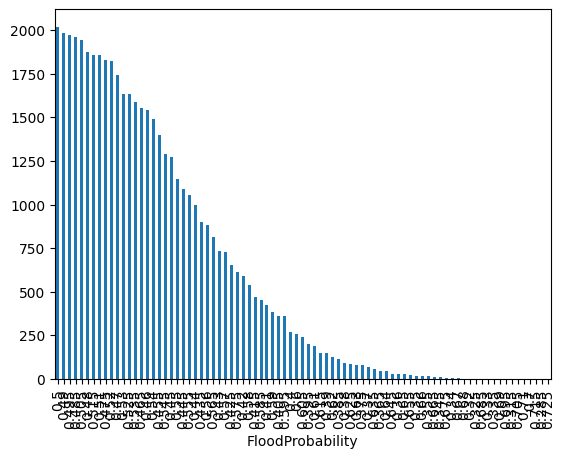

In [20]:
target.value_counts().plot(kind="bar")

In [21]:
print("Lima baris pertama dataset:")
print(data.head())
print("\nStatistik deskriptif:\n", data.describe())

Lima baris pertama dataset:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  IneffectiveDisas

In [22]:
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histograms and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()

        # Histogram
        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Box plot
        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        plt.tight_layout()
        plt.show()

def get_count_plot(data, cat): # Update the function to accept df_train as an argument
    ax=sns.countplot(x=data[cat],
                   order=data[cat].value_counts(ascending=False).index);

    abs_values = data[cat].value_counts(ascending=False)
    rel_values = data[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of "+cat+" Values",fontsize=16)

<Figure size 2500x1200 with 0 Axes>

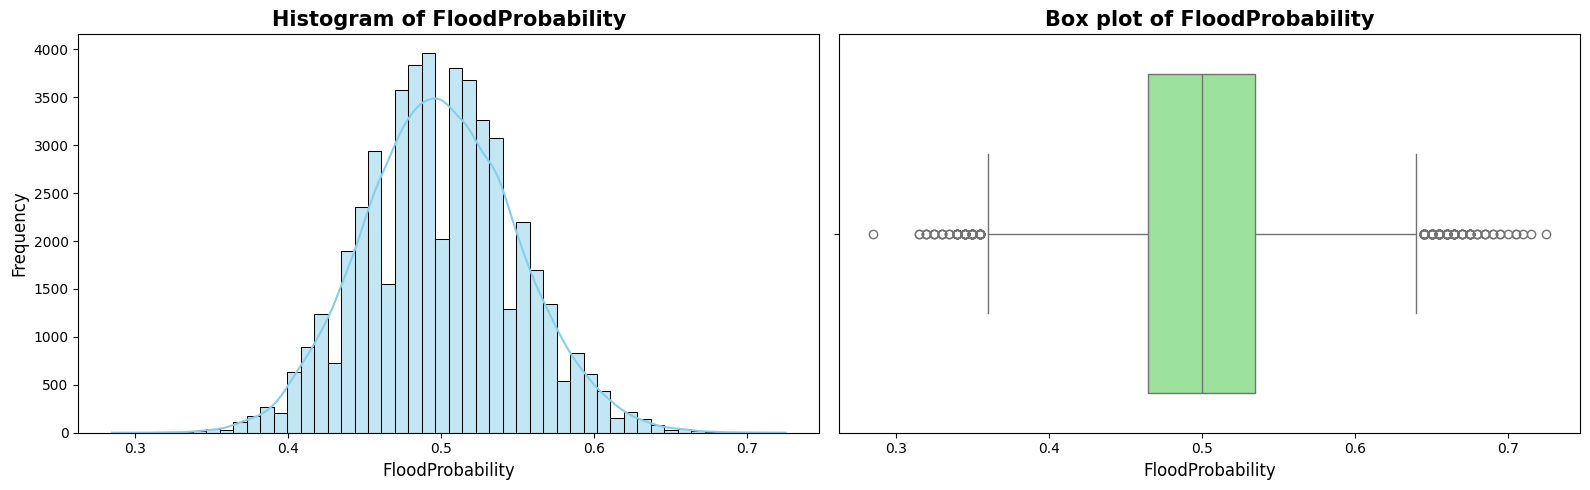

In [23]:
plt.figure(figsize=(25, 12))
plot_numerics(data[['FloodProbability']]) # Replace df_train with data

In [24]:
num_cols=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

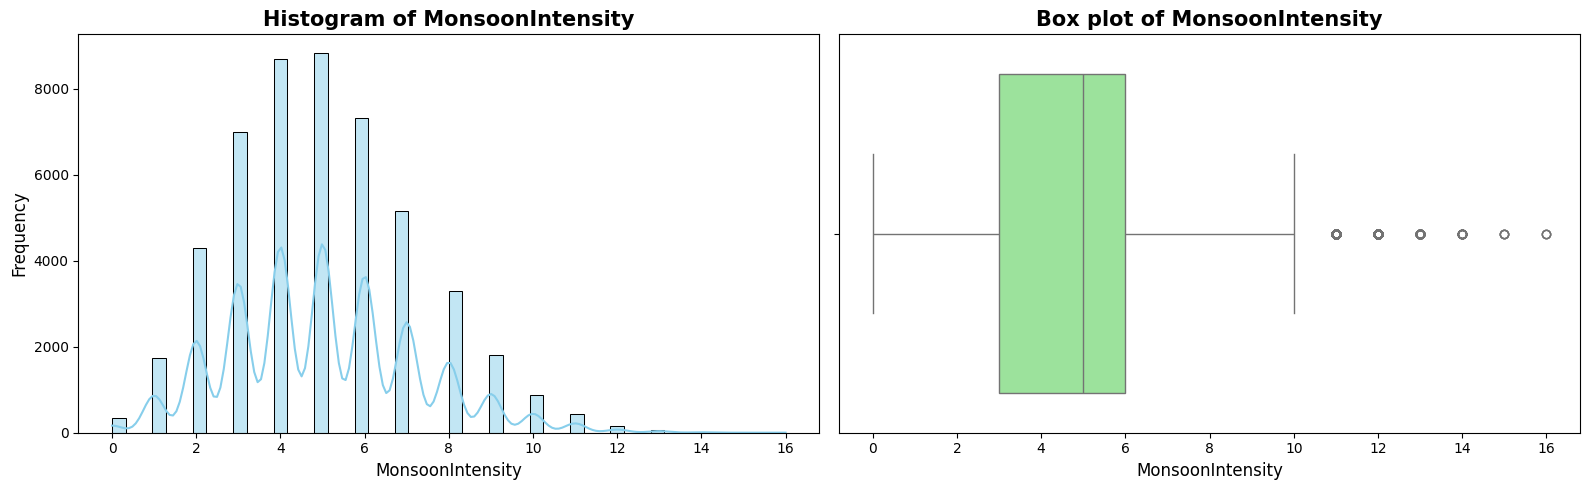

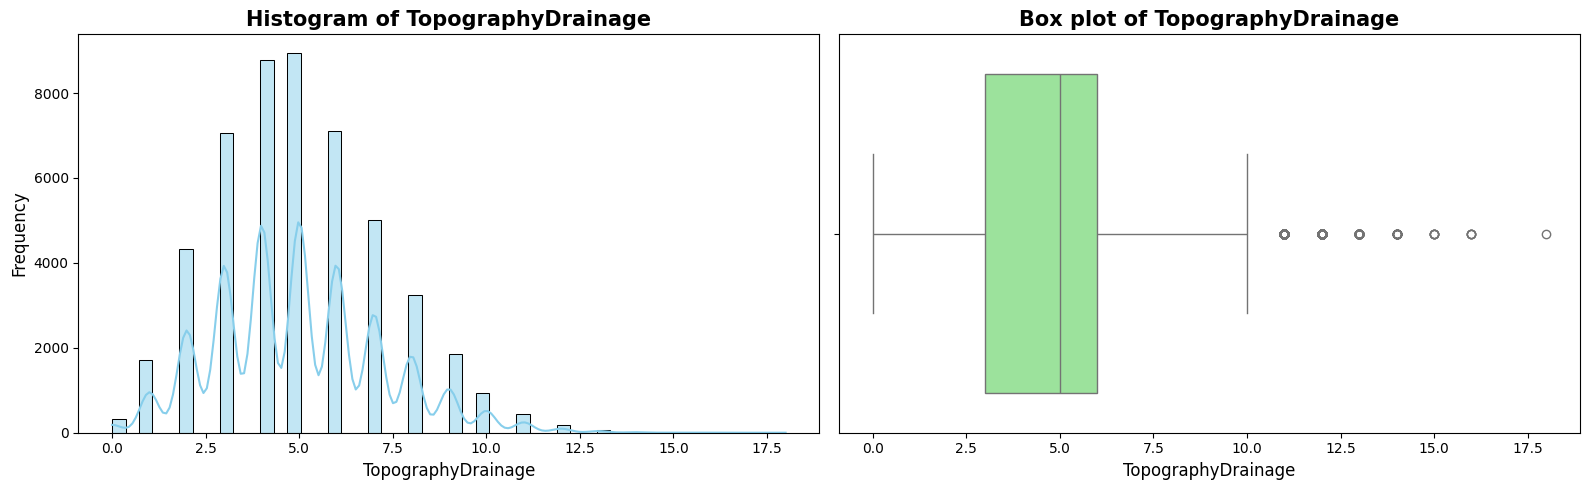

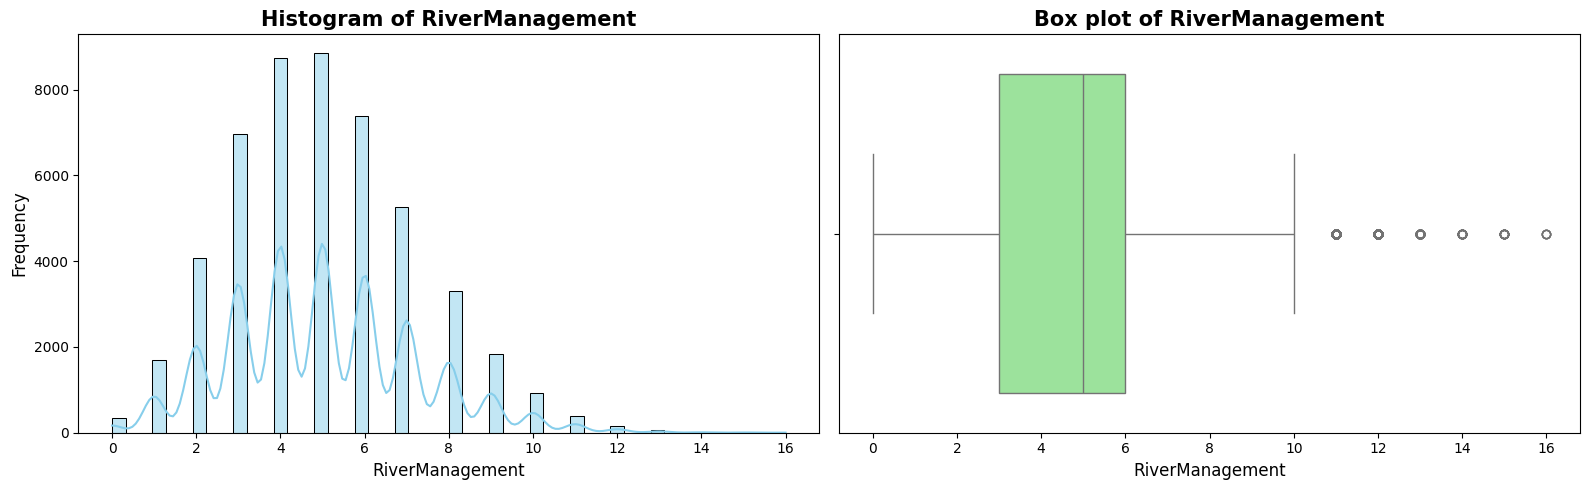

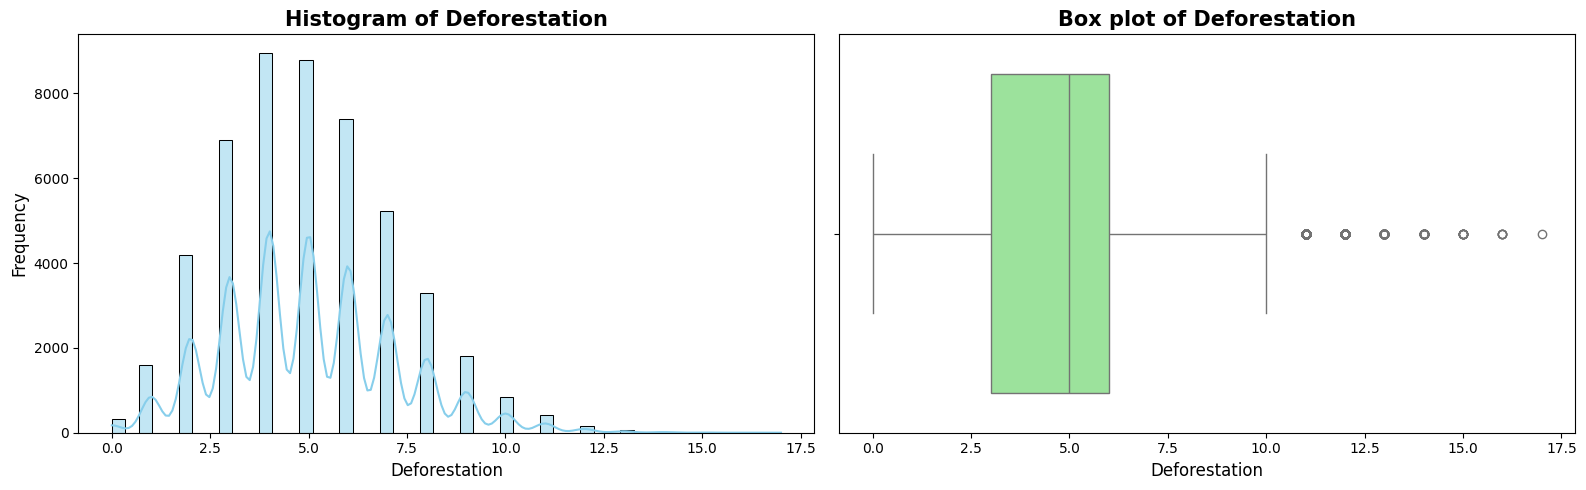

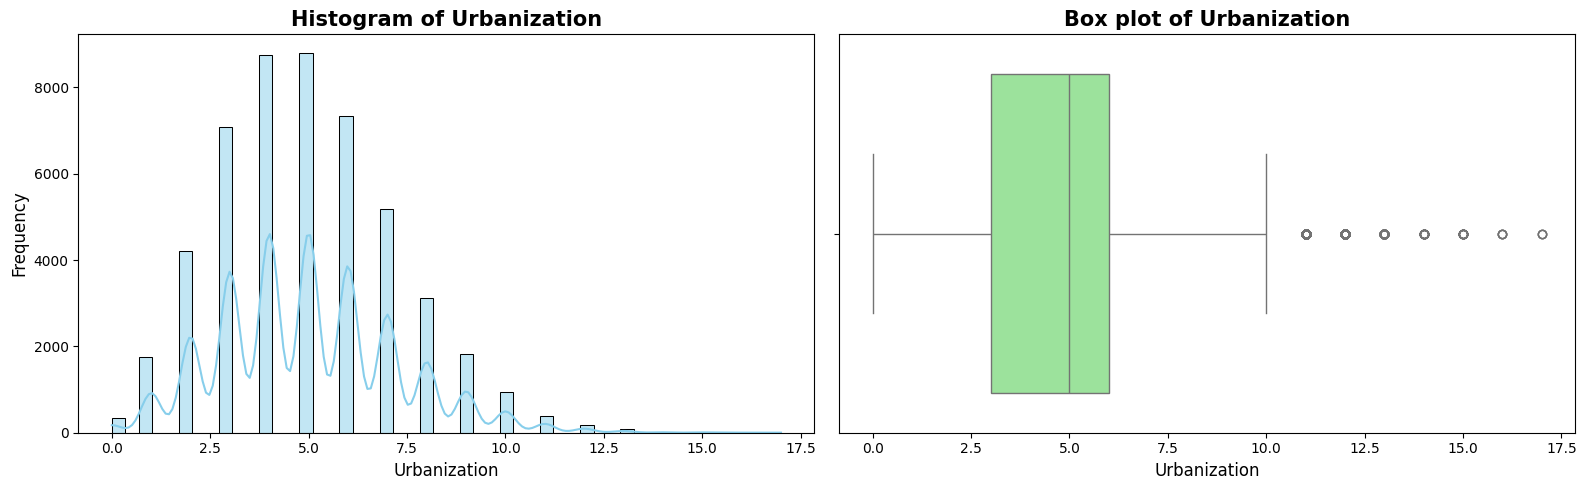

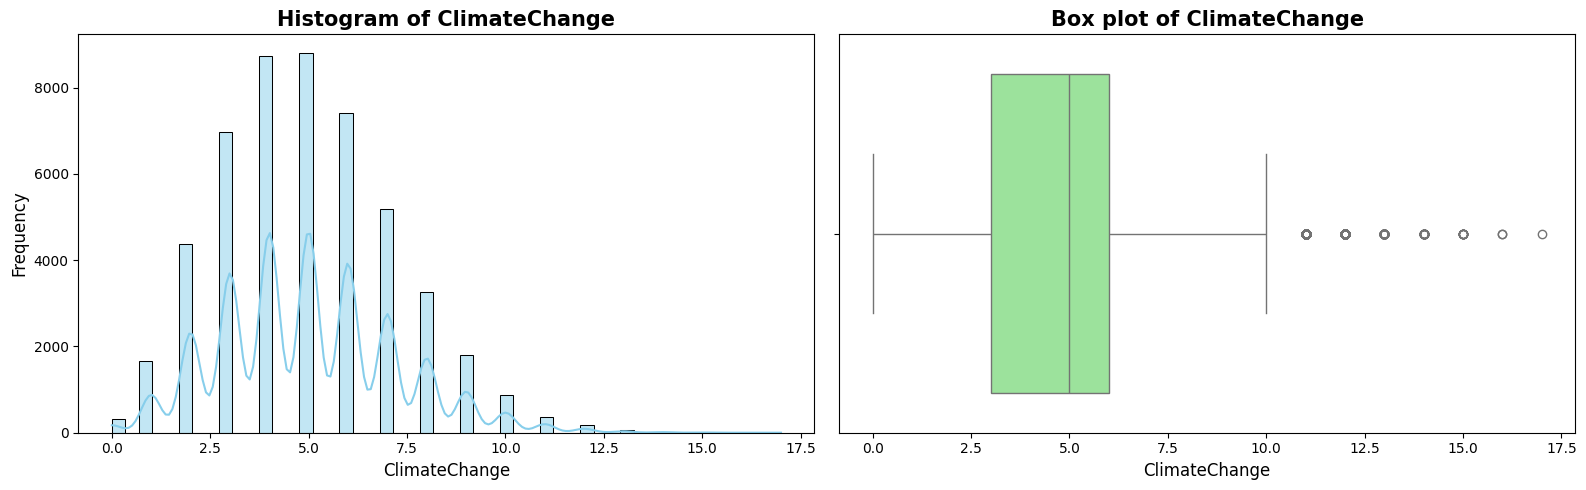

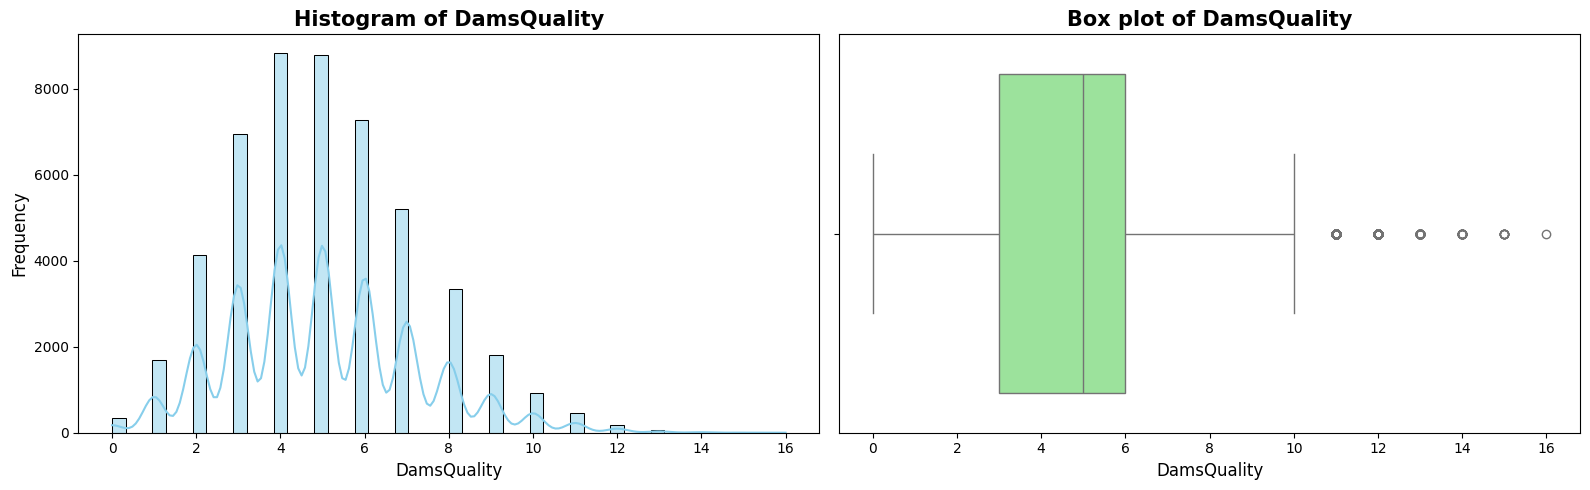

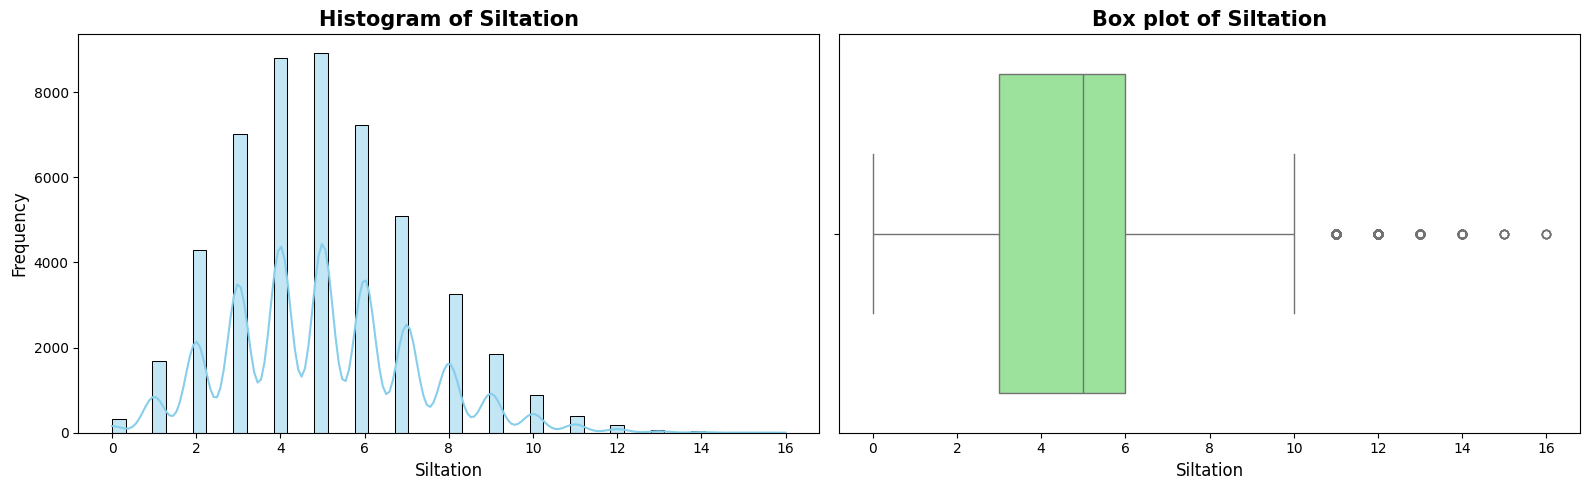

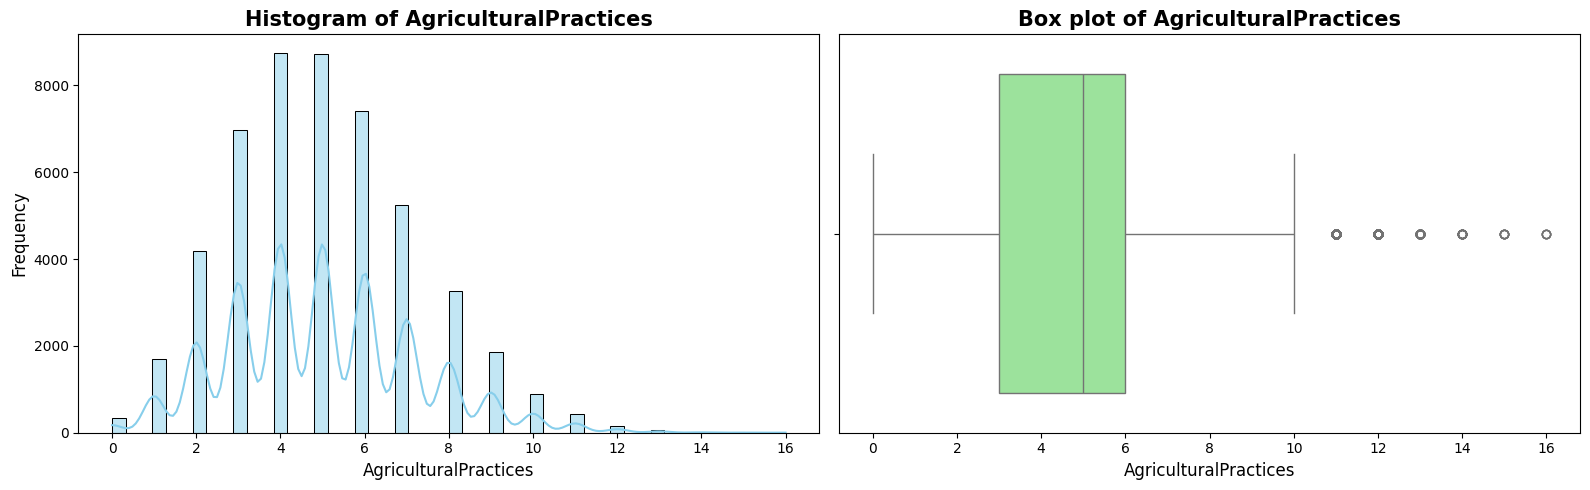

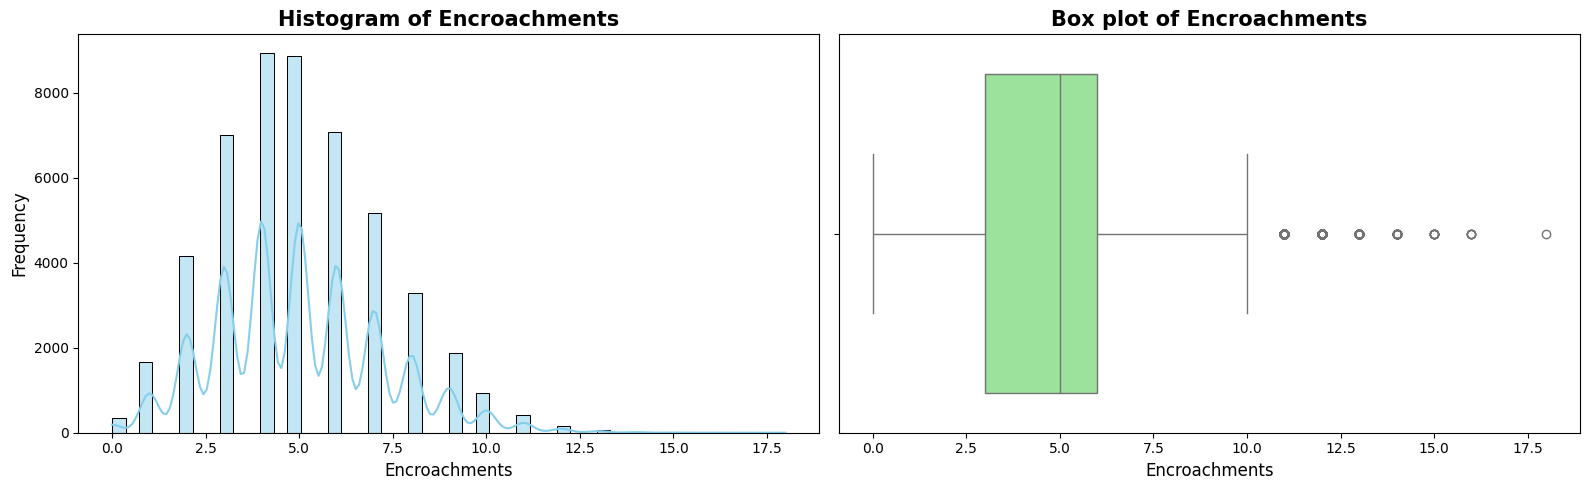

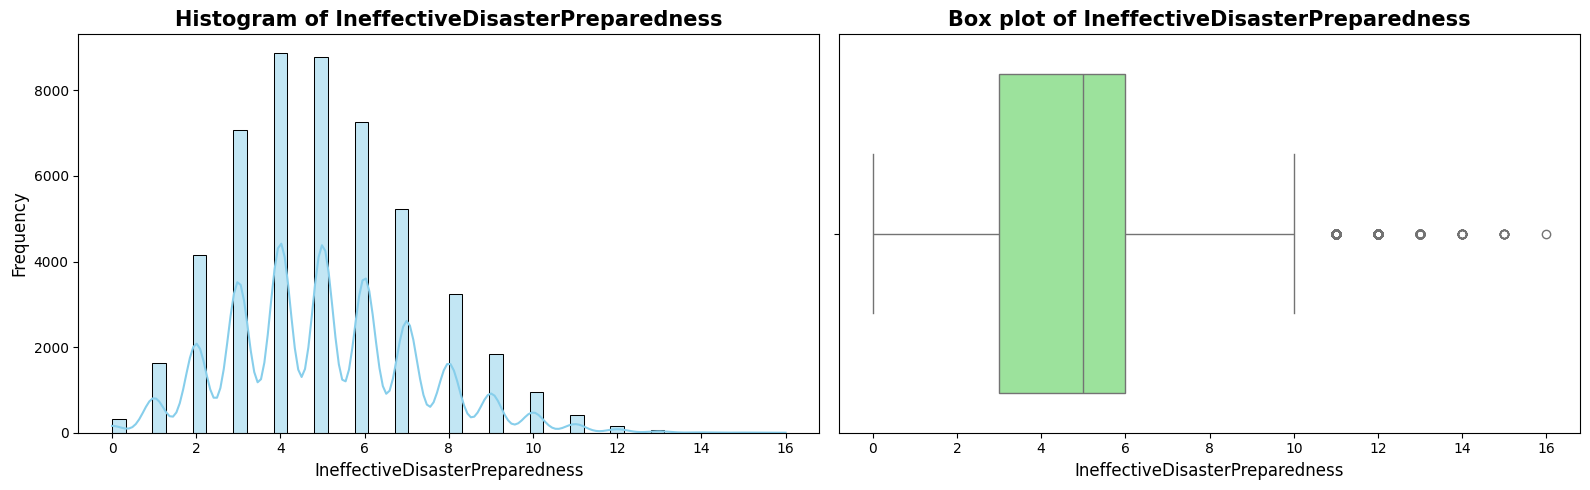

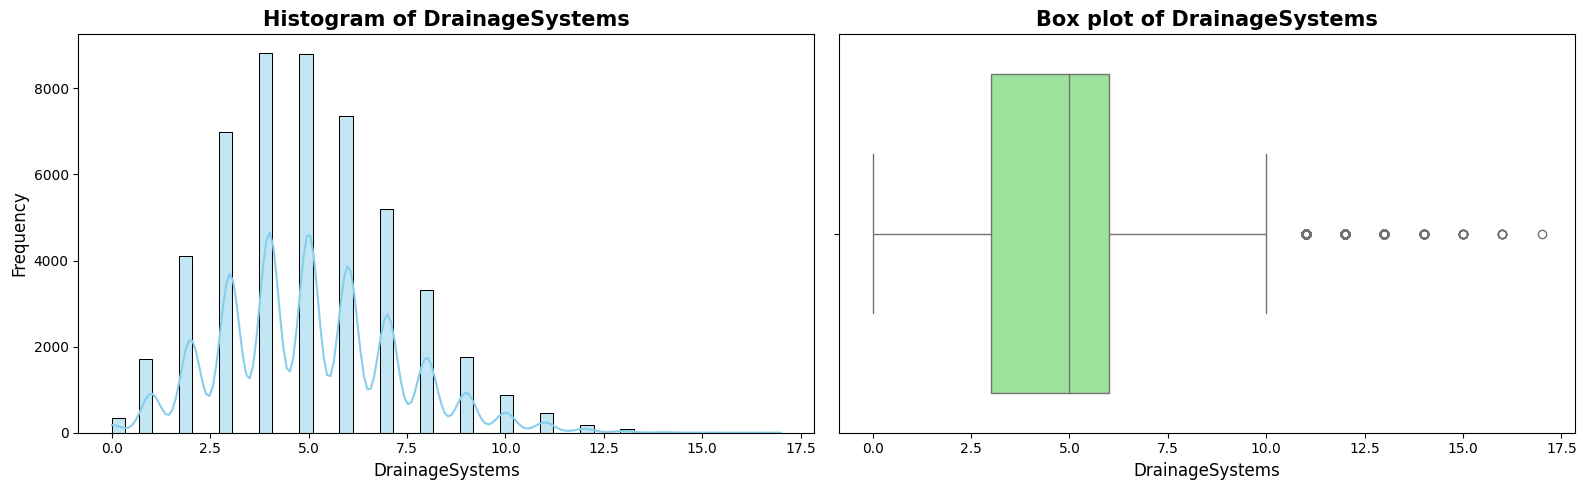

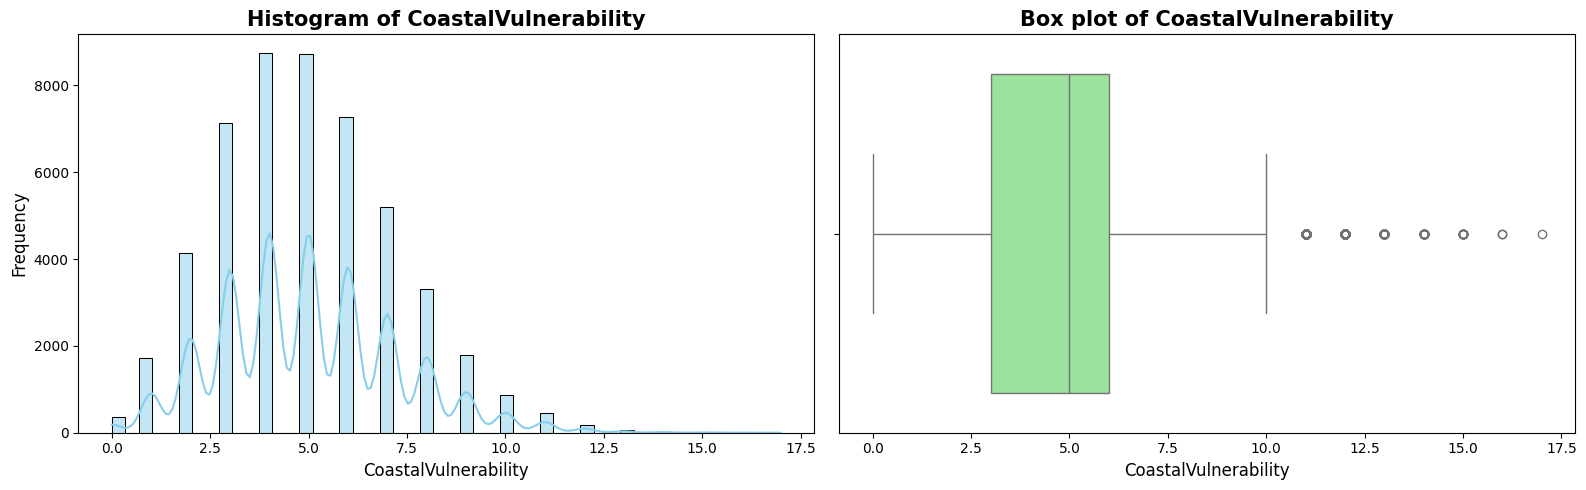

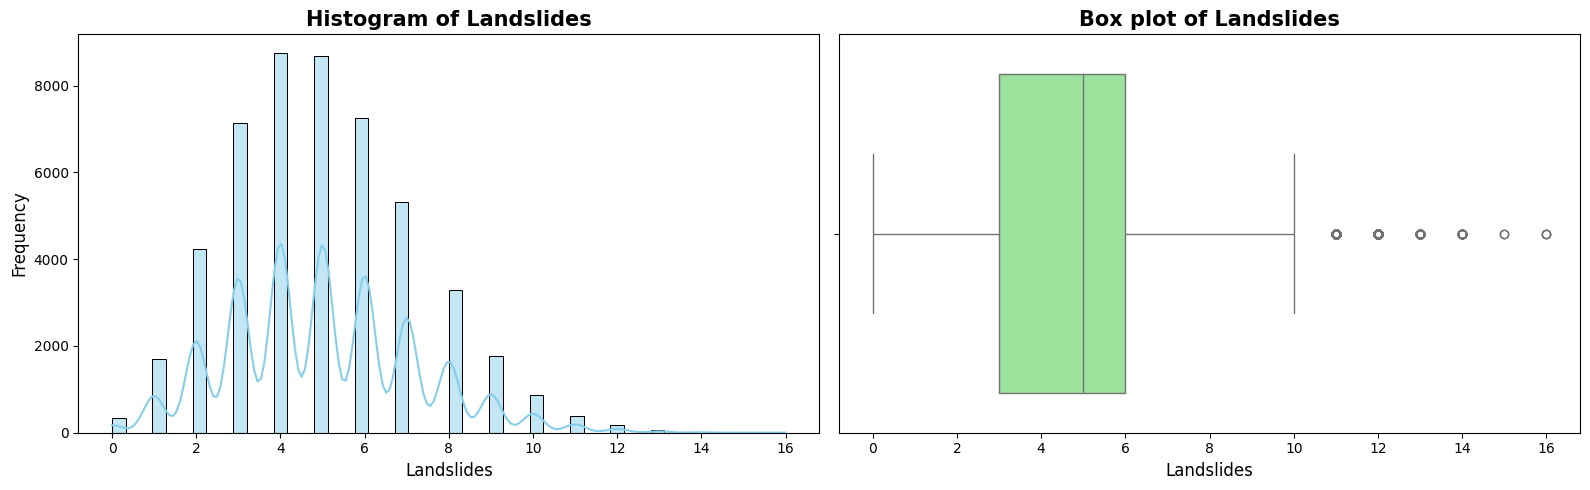

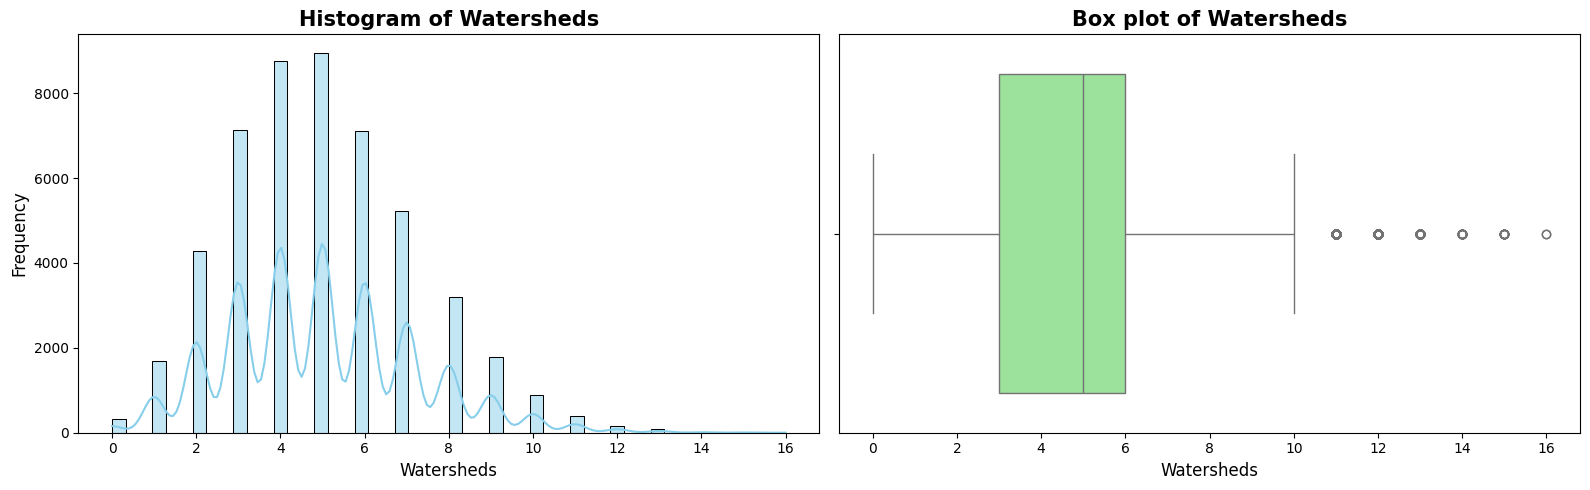

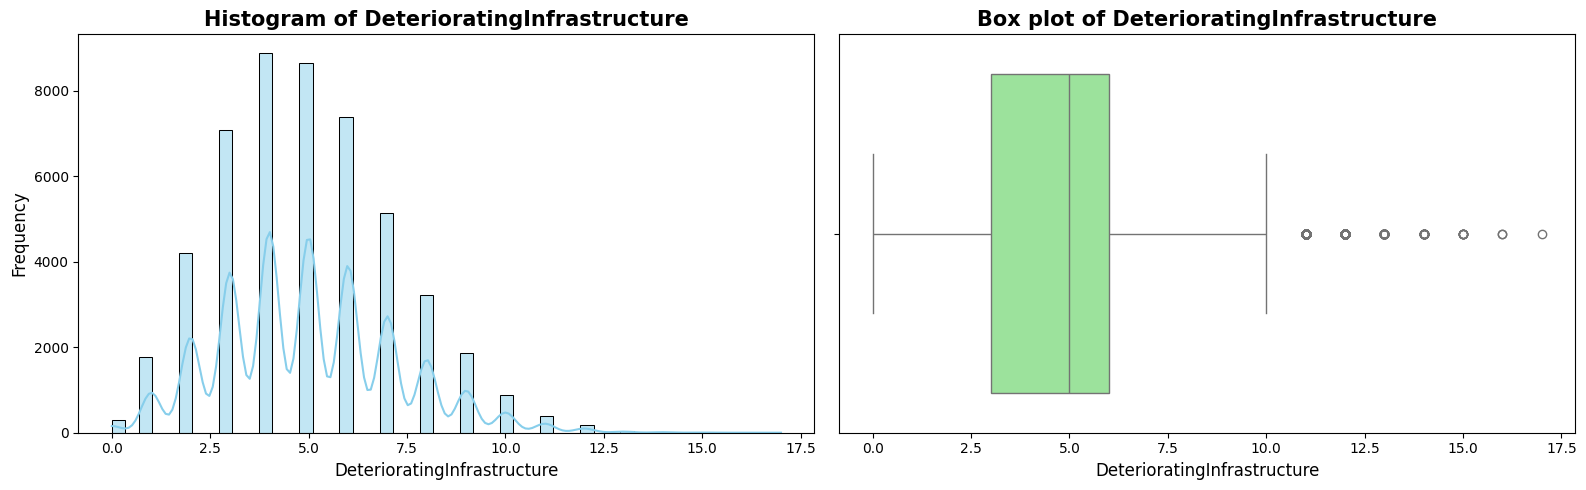

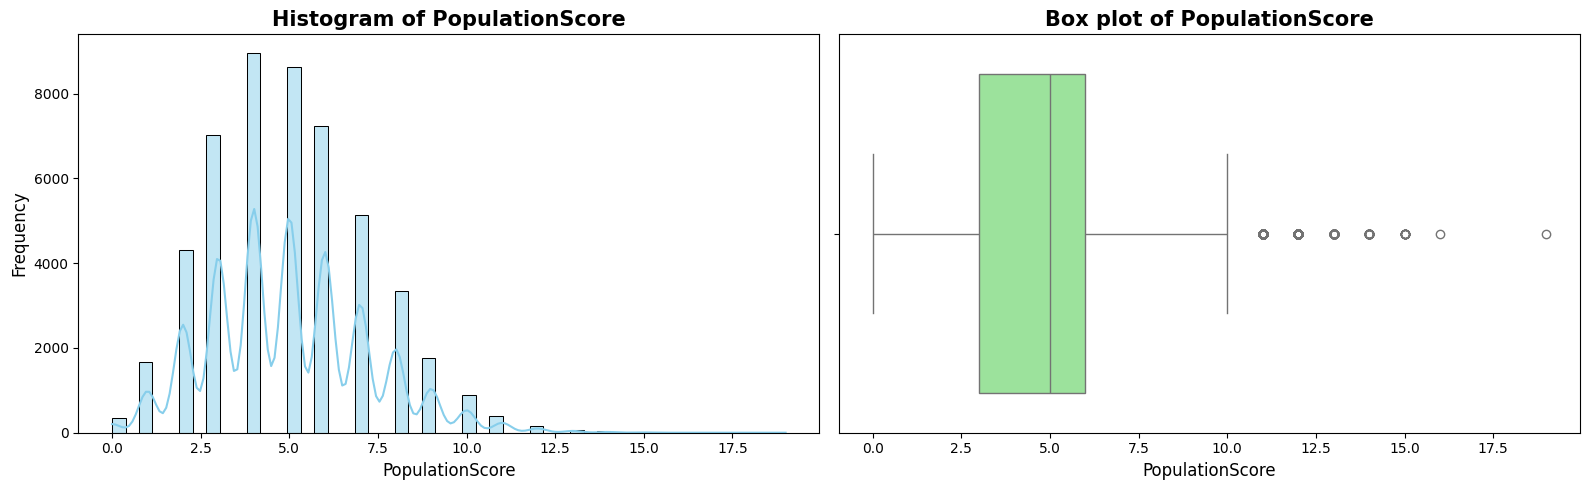

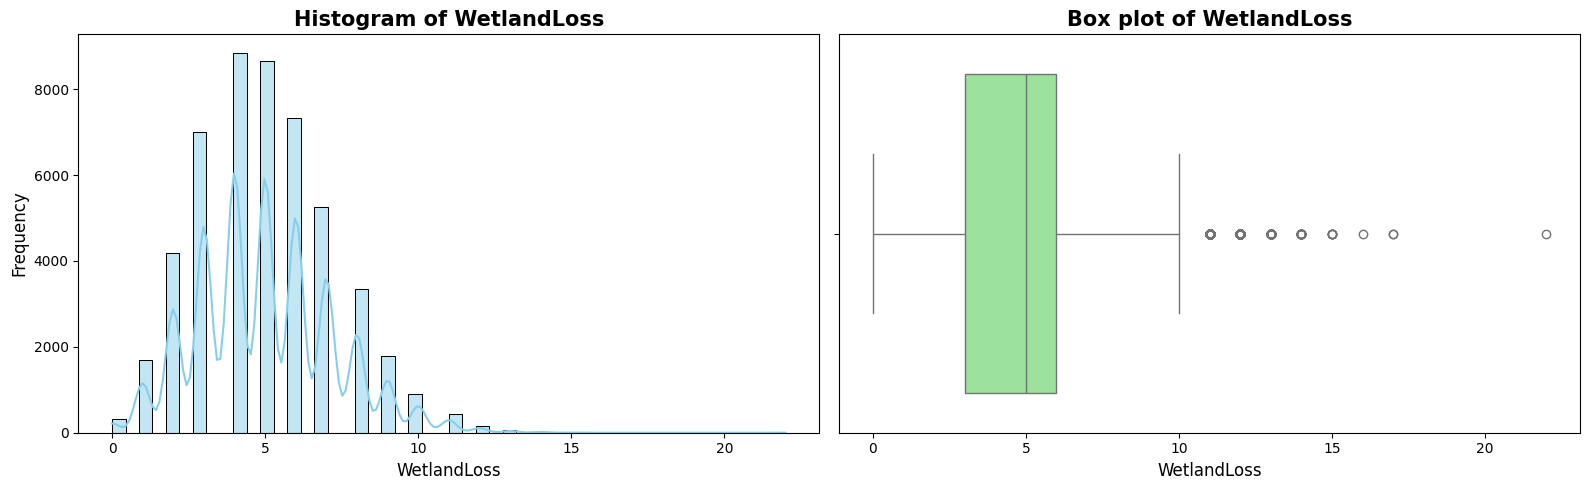

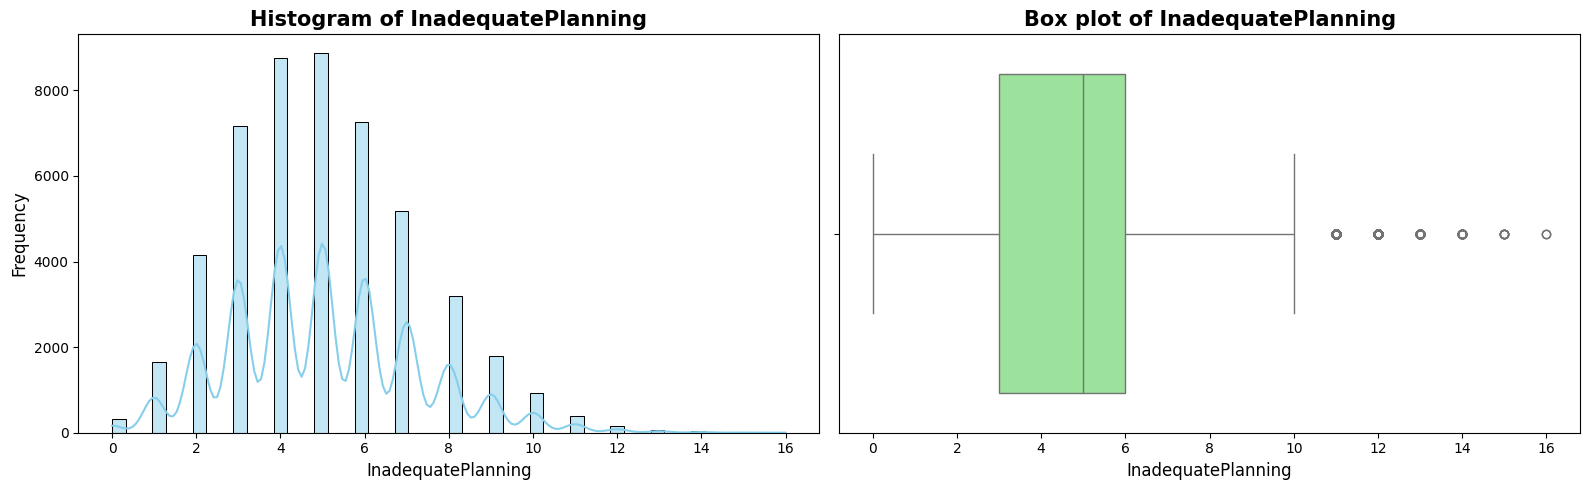

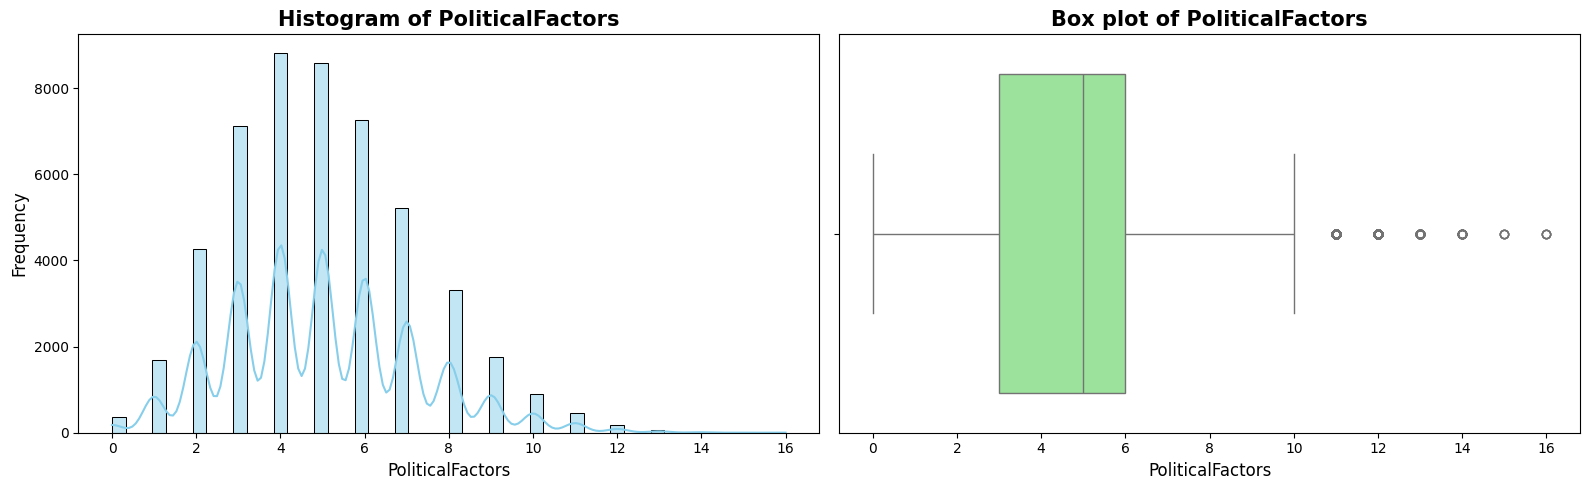

In [25]:
plot_numerics(data[num_cols]) # Replace df_train with data

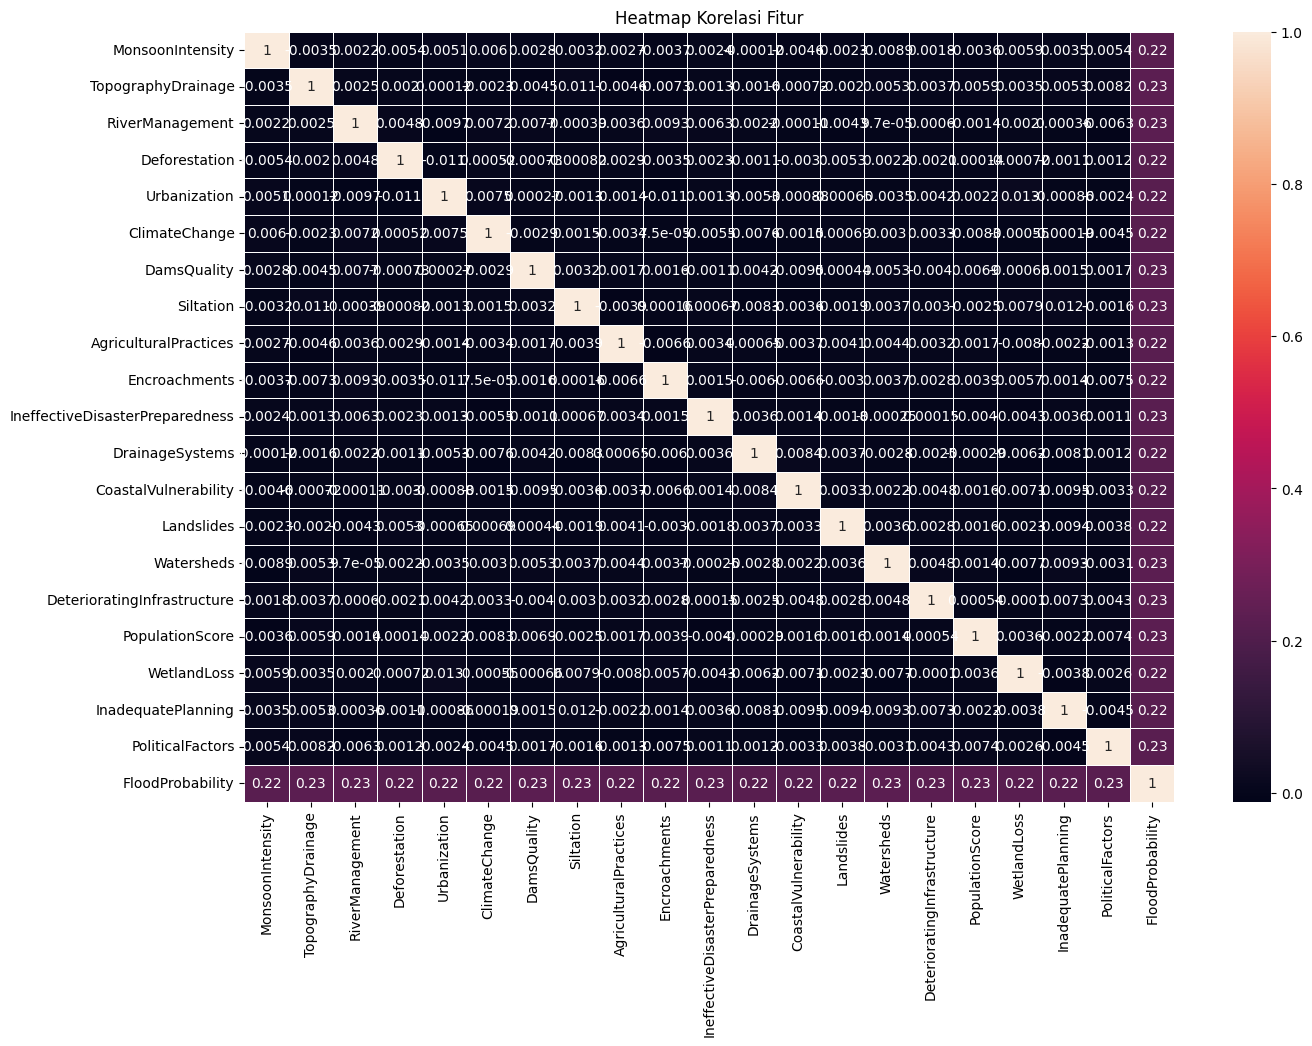

In [26]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [27]:
model_svm = SVR(kernel='rbf')
model_svm.fit(X_train, Y_train)
y_pred_svm = model_svm.predict(X_test)

In [28]:
# Evaluasi SVM
print("\nEvaluasi Model SVM:")
print('Accuracy: ', model_svm.score(X_test, Y_test))
r2_svm = r2_score(Y_test, y_pred_svm)
mae_svm = mean_absolute_error(Y_test, y_pred_svm)
mse_svm = mean_squared_error(Y_test, y_pred_svm)
print("MSE:", mse_svm)
print("MAE:", mae_svm)
print("R2 SCORE:", r2_svm)


Evaluasi Model SVM:
Accuracy:  0.7200938781158139
MSE: 0.0006971301967531037
MAE: 0.020156666792254037
R2 SCORE: 0.7200938781158139


In [32]:
model_lgbm = LGBMRegressor()  # Initialize the LightGBM Regressor
model_lgbm.fit(X_train, Y_train)  # Train the model
y_pred_lgbm = model_lgbm.predict(X_test)  # Make predictions on the test set

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 20
[LightGBM] [Info] Start training from score 0.499519


In [34]:
# Evaluasi LightGBM
print("\nEvaluasi Model LightGBM:")
print('Accuracy: ', model_lgbm.score(X_test, Y_test))
r2_lgbm = r2_score(Y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(Y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(Y_test, y_pred_lgbm)
print("MSE:", mse_lgbm)
print("MAE:", mae_lgbm)
print("R2 SCORE:", r2_lgbm)


Evaluasi Model LightGBM:
Accuracy:  0.9229458999823253
MSE: 0.000191909843001507
MAE: 0.010595798864079997
R2 SCORE: 0.9229458999823253


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/flood.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
datanya = '/content/flood.csv'
df = pd.read_csv(datanya)
print(df.head())

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSys

In [39]:
missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


Matriks Korelasi:
                                 MonsoonIntensity  TopographyDrainage  \
MonsoonIntensity                         1.000000           -0.003470   
TopographyDrainage                      -0.003470            1.000000   
RiverManagement                          0.002247            0.002492   
Deforestation                           -0.005384            0.002046   
Urbanization                             0.005092            0.000116   
ClimateChange                            0.005959           -0.002288   
DamsQuality                              0.002790           -0.004472   
Siltation                               -0.003191            0.010675   
AgriculturalPractices                    0.002723           -0.004550   
Encroachments                           -0.003723           -0.007272   
IneffectiveDisasterPreparedness          0.002358            0.001328   
DrainageSystems                         -0.000118           -0.001608   
CoastalVulnerability             

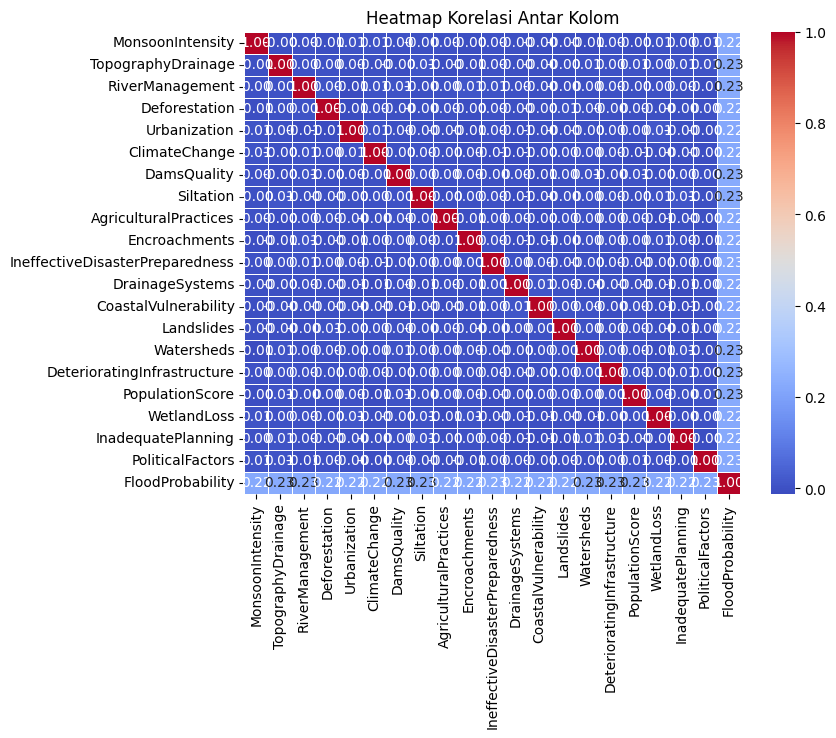

In [40]:
# Hitung matriks korelasi
correlation_matrix = df.corr()

# Tampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Kolom")
plt.show()

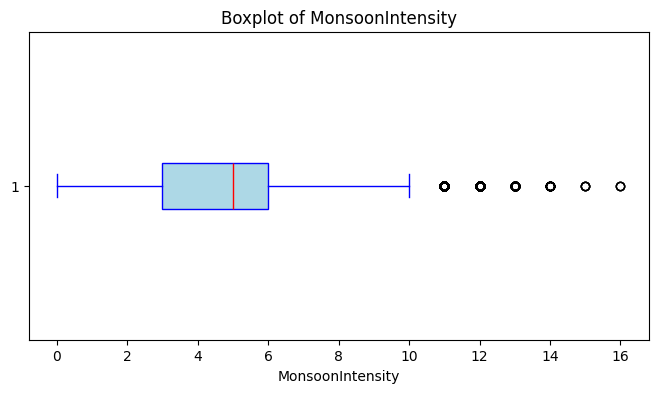

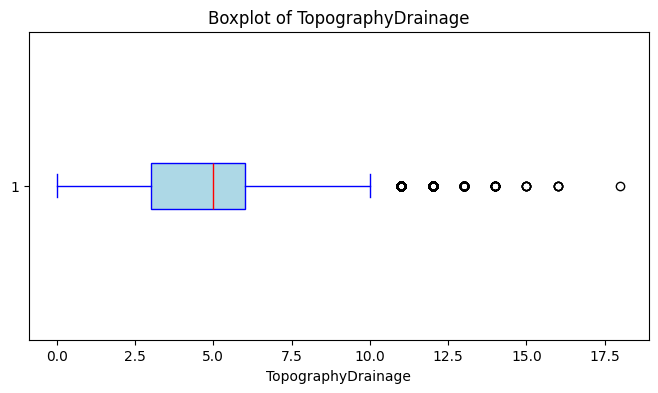

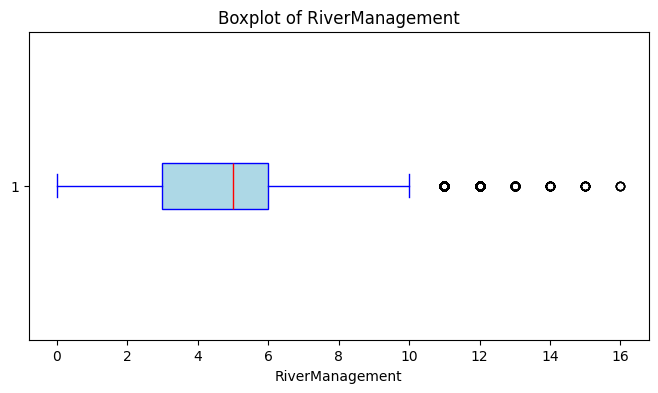

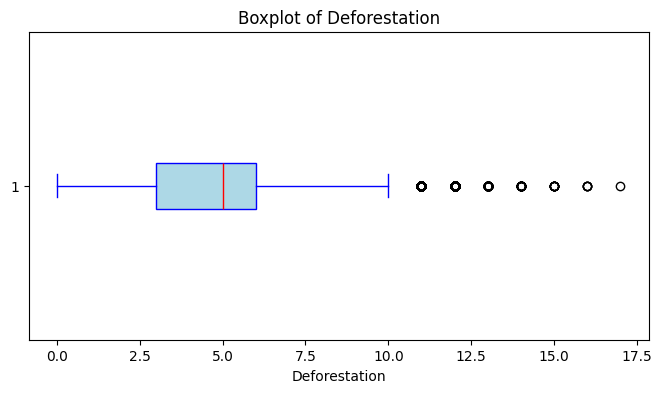

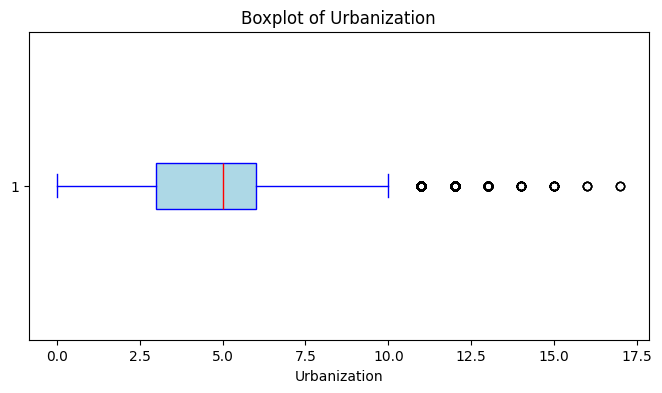

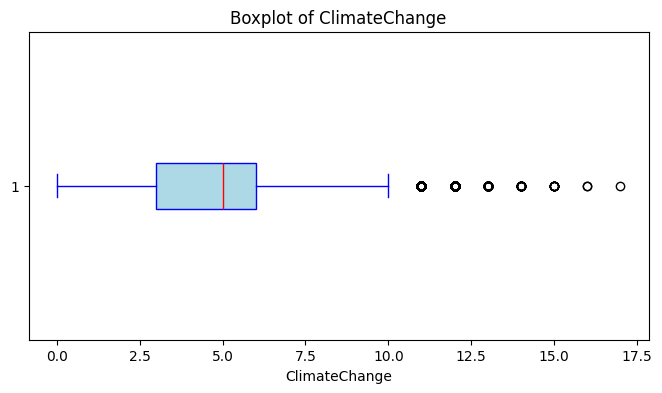

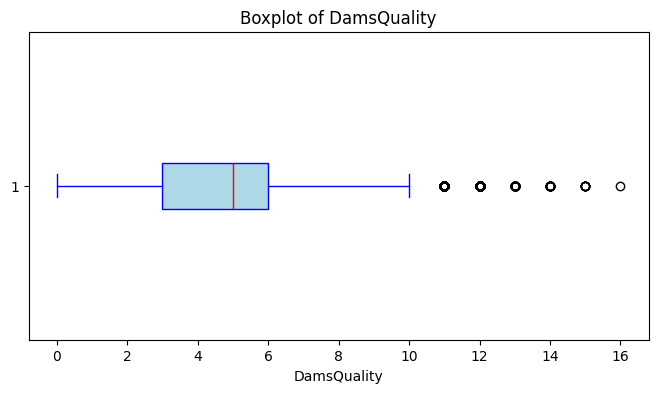

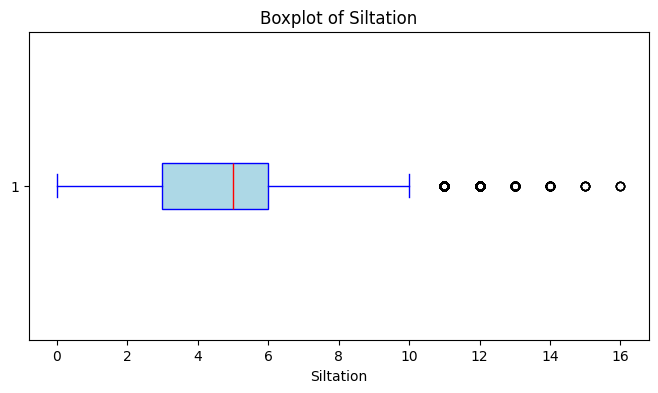

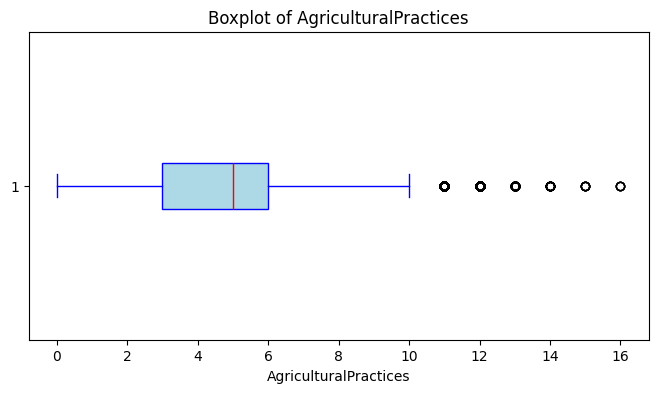

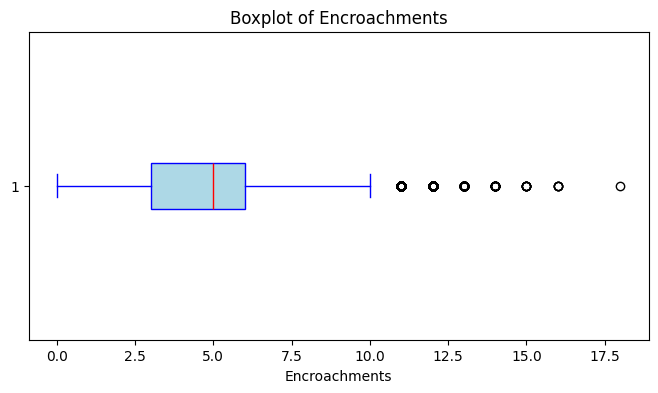

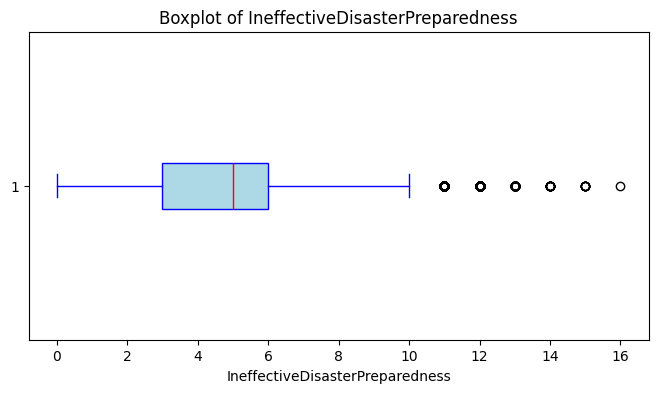

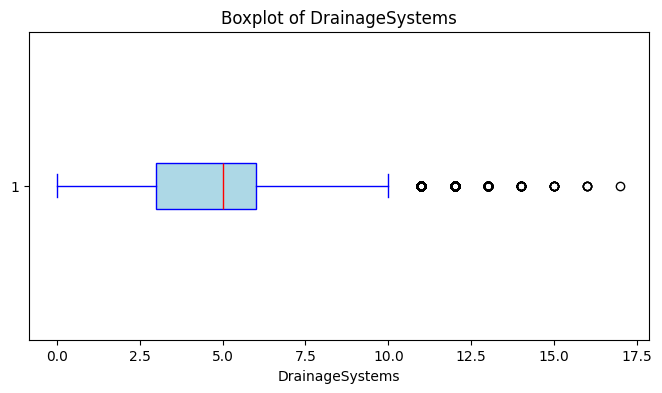

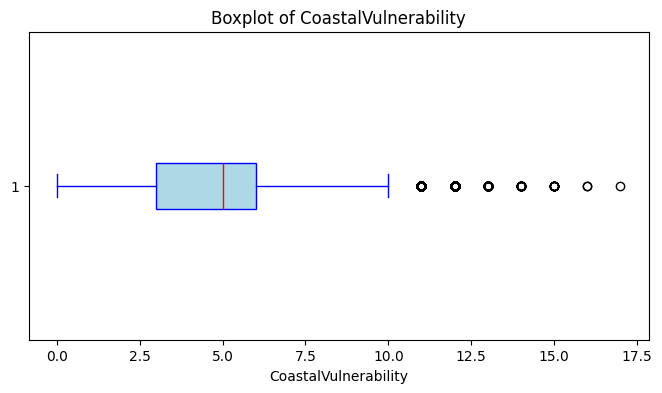

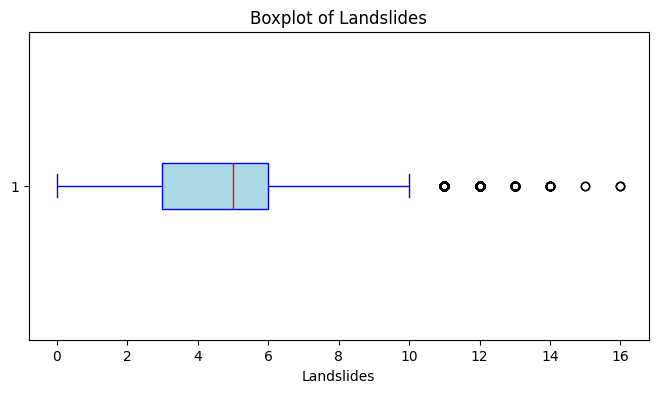

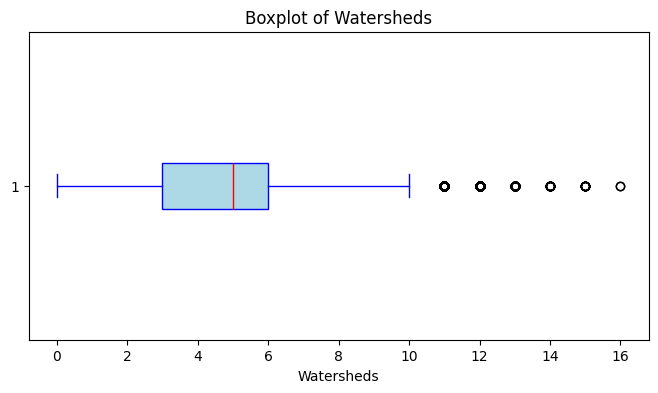

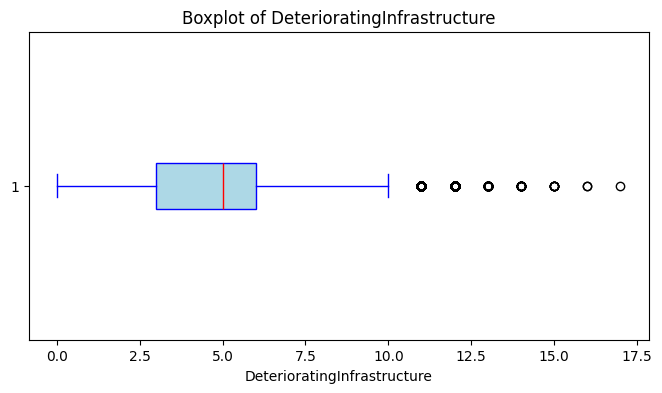

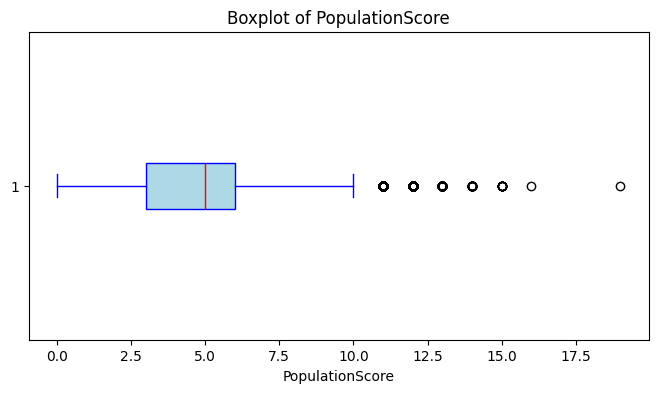

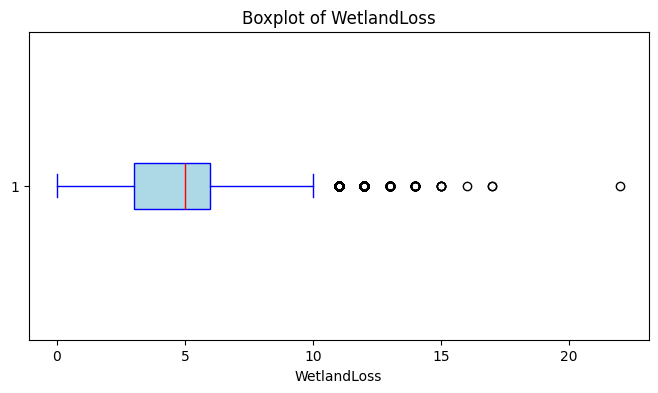

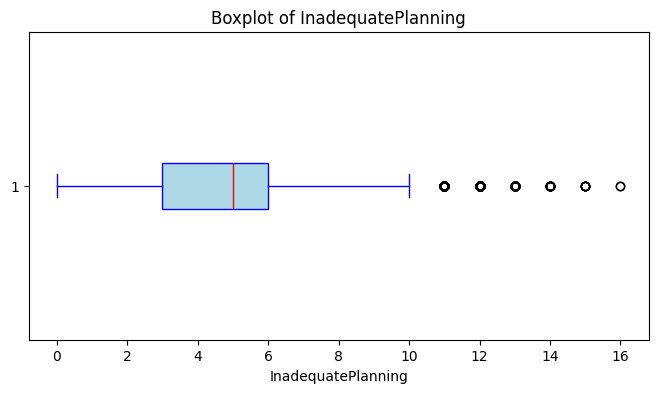

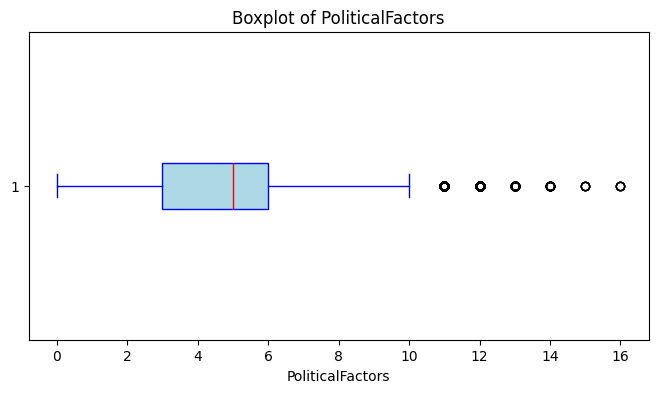

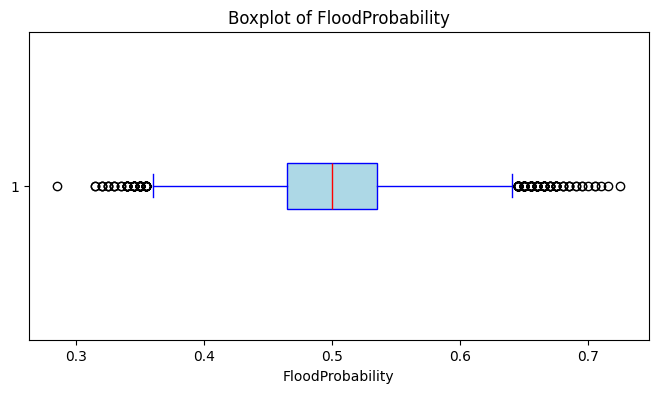

In [41]:
# Pilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualisasi boxplot untuk setiap kolom numerik
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'))
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [42]:
# Pisahkan target dan fitur
target = 'FloodProbability'
features = df.drop(columns=[target])

Mean Squared Error: 0.0006737141275000004
R-squared: 0.7294957103200914


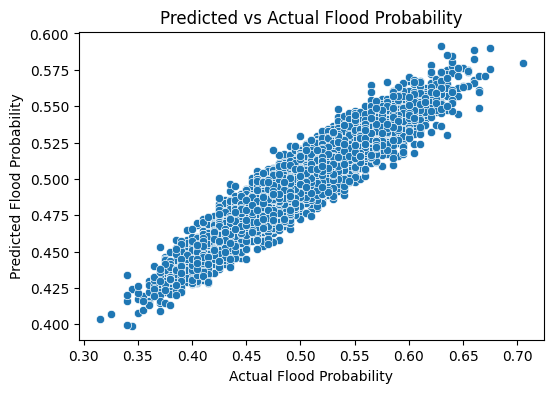

In [44]:
X = features
y = df[target]
# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest untuk regresi
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi menggunakan data testing
y_pred = rf_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Predicted vs Actual Flood Probability")
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0158 - val_loss: 2.9688e-04
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9717e-04 - val_loss: 6.5146e-05
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.5245e-05 - val_loss: 2.3654e-05
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.1793e-05 - val_loss: 1.0064e-05
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0365e-05 - val_loss: 1.1359e-05
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2049e-05 - val_loss: 4.5060e-06
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0320e-05 - val_loss: 8.2218e-06
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.9257e-06 - val_loss: 1.6793e-06
Epoch 9/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.2547e-06 - val_loss: 1.4690e-06
Epoch 10/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.0594e-06 - val_loss: 3.8329e-06
Epoch 11/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5

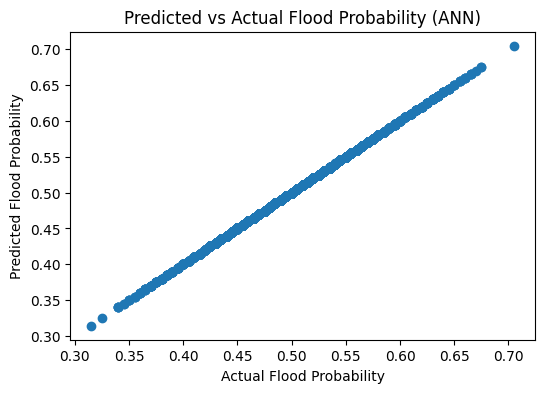

In [45]:
# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan fitur (ANN biasanya membutuhkan data yang diskalakan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model ANN
model = Sequential()

# Input layer dan hidden layer pertama
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layer kedua
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Prediksi menggunakan data testing
y_pred = model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualisasi prediksi vs aktual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.title("Predicted vs Actual Flood Probability (ANN)")
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.show()